# Housing Sales Price Prediction

The overall aim of the assignment is to build and test different regression models. I was fascinated by the housing sale price dataset. The most popular one is probably the Boston Housing dataset, and the other being Ames Housing dataset. While both are equally challenging, I decided to go with the Ames Housing dataset as it provides much more observations and features to explore.

## Objective
The primary objective is to build and test a regression model that balances prediction and interpretability. An overview of the plan includes:
1. Dataset selection
2. Data cleaning and feature engineering
3. Build and test different regression models
4. Choose the best model that has a good trade-off between bias and variance

## Dataset
Ames Housing dataset will be used for building and testing different regression models. The Ames, Iowa dataset was compiled from the Ames, Iowa Assessor's office by Dean De Cock (Truman State University). This was aimed at being an alternate to the Boston Housing dataset for regression analysis.
<br>The original paper can be found at: http://jse.amstat.org/v19n3/decock.pdf 
<br>Original dataset can be downloaded from: https://www.openintro.org/book/statdata/ames.csv

### Description
Although the original data has 2930 entries / observation across 82 features. This version of the data was provided as part of the course and has 1379 entries / observations across 80 features. The two missing features in this subset dataset are 'Order' and 'PID'. This is because 'Order' is just an index, and PID is Parcel Identification Number assigned to each property within the Ames Assessor’s system. Both of these would not impact the prediction as these are just identification numbers that don't add value to a property.
<br> Data includes 43 objects, 16 int64, and 21 float64 datatypes. There are no missing values. Since there are 80 features along with categorical values, detailing each here would be tedious. Therefore, below is a link to the Data Description file with information regarding each variable and also information of categorical values.
<br> Data Description: http://www.amstat.org/v19n3/decock/DataDocumentation.txt
<br> For the purpose of this assignment, of the 80 features, the 'SalesPrice' will be the target variable. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
rawdata = pd.read_csv('Ames_Housing_Sales.csv')

# Print counts of data types
print(rawdata.dtypes.value_counts())

# Print few records
rawdata

object     43
float64    21
int64      16
dtype: int64


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,None,3,1Fam,None,None,0.0,0.0,...,0.0,Pave,7,953.0,AllPub,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,None,3,1Fam,TA,No,790.0,163.0,...,0.0,Pave,7,1542.0,AllPub,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,None,4,1Fam,Gd,No,275.0,0.0,...,0.0,Pave,9,1152.0,AllPub,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,None,2,1Fam,TA,Mn,49.0,1029.0,...,0.0,Pave,5,1078.0,AllPub,366.0,1950,1996,2010,142125.0


In [3]:
# Check for null values
(rawdata.isnull().any() == True).any()

False

### Data Cleaning & Feature Engineering
Since data has no null values, there is no further cleaning required. Furthermore, as author suggested GrLivArea > 4000 should be removed as these are spurious data. However, histogram of the data shows that some of the features are skewed. Furthermore, categorical features are encoded to create new features.
1. Apply log transformation for skwed data
2. Encode categorical data

array([[<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'3SsnPorch'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>],
       [<AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>,
        <AxesSubplot:title={'center':'FullBath'}>],
       [<AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'GarageCars'}>,
        <AxesSubplot:title={'center':'GarageYrBlt'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'}>],
       [<AxesSubplot:title={'center':'LotA

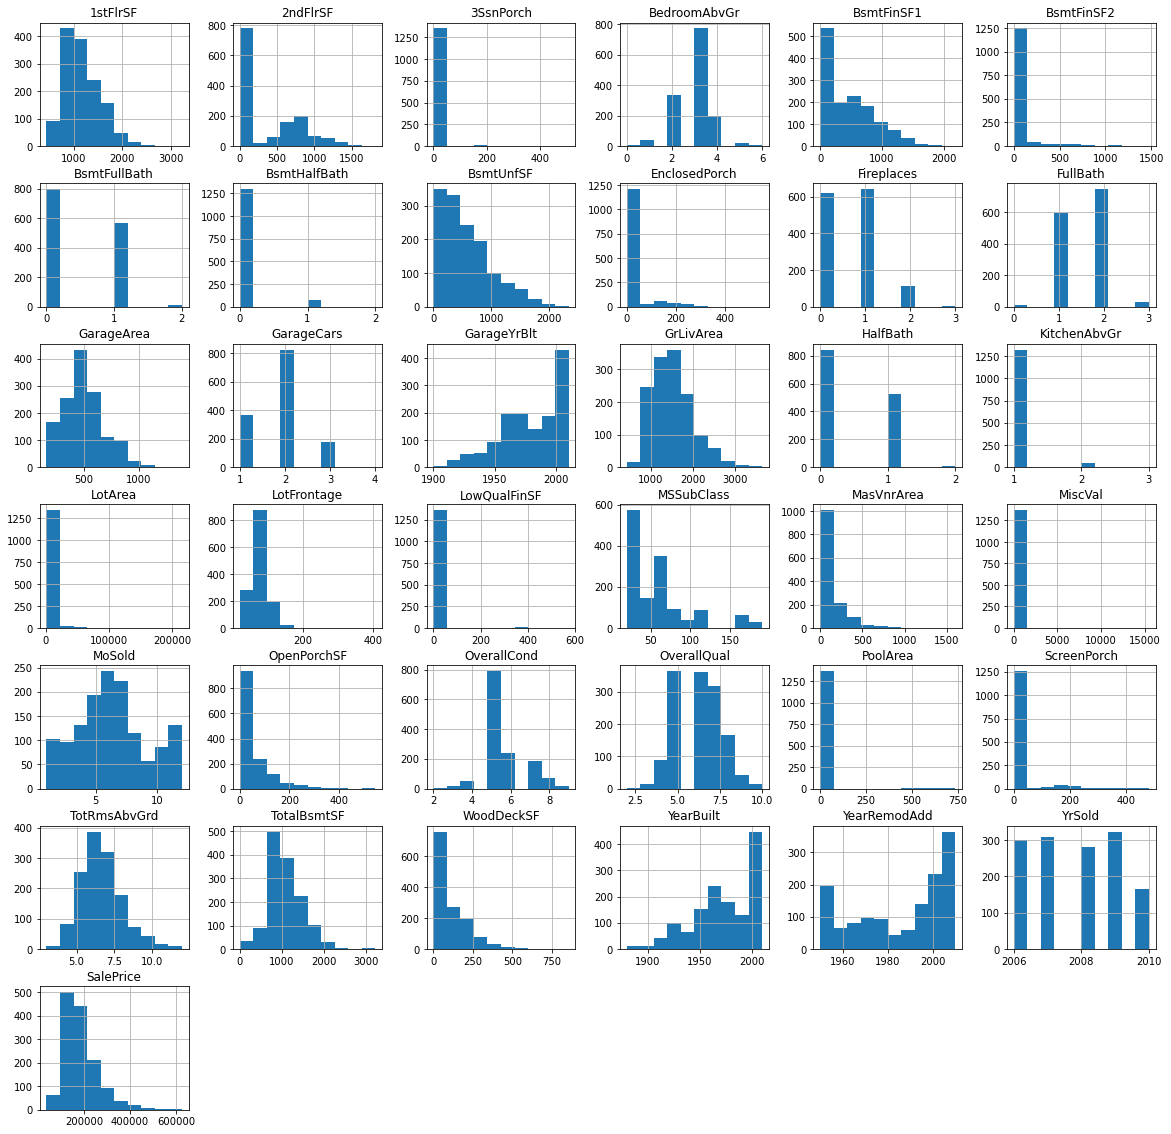

In [4]:
# Create a copy of data
data = rawdata.copy()

# Remove GRLivArea > 4000
data = data[data['GrLivArea'] <= 4000]
data.reset_index()

# Plot data distribution
numcols = data.dtypes == float
data[numcols.index.to_list()].hist(figsize=(20,20))

#### Log transformation

In [5]:
# Create a list of float columns to check for skewing
# Ignore columns that have been encoded
mask = data.dtypes == float
float_cols = data.columns[mask]

skew_limit = 0.75
skew_vals = data[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
MiscVal,24.805080
PoolArea,17.024368
LotArea,12.388644
LowQualFinSF,10.696673
3SsnPorch,9.992209
BsmtFinSF2,4.187659
ScreenPorch,3.980237
EnclosedPorch,3.207167
MasVnrArea,2.581611
LotFrontage,2.505610


In [6]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    if col == "SalePrice": continue
    data[col] = data[col].apply(np.log1p)

array([[<AxesSubplot:title={'center':'MiscVal'}>,
        <AxesSubplot:title={'center':'PoolArea'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>],
       [<AxesSubplot:title={'center':'3SsnPorch'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'ScreenPorch'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>],
       [<AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'SalePrice'}>],
       [<AxesSubplot:title={'center':'WoodDeckSF'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>],
       [<AxesSubplot:title={'center':'GarageArea'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

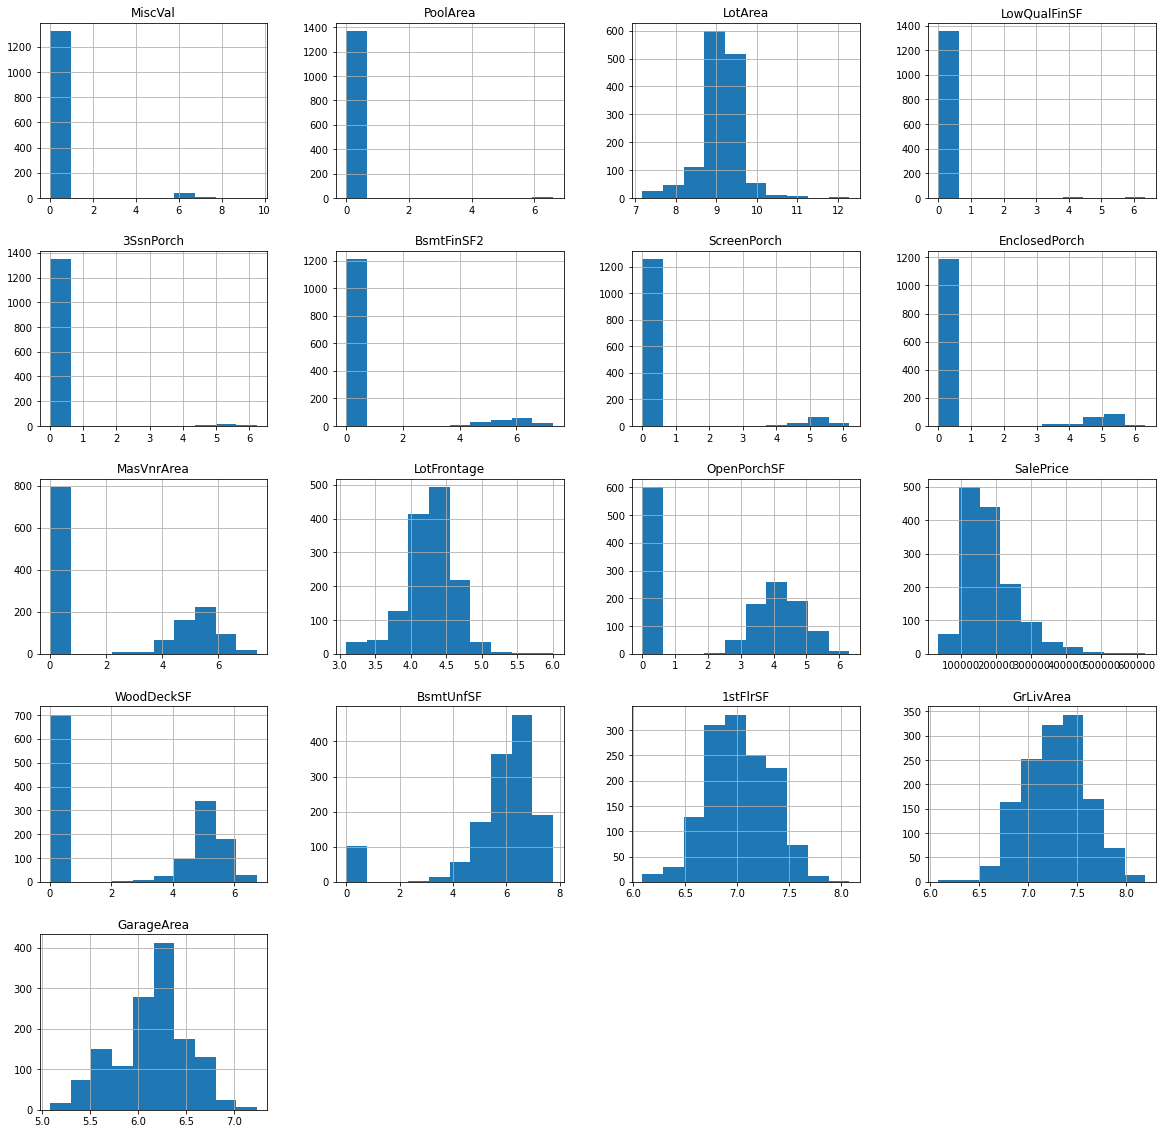

In [7]:
# Plot only skew cols check distribution
data[skew_cols.index.to_list()].hist(figsize=(20,20))

The skewed columns are now close to normally distributed. For example, the GrLivArea which was right skewed now has a normal distribution. It may be confusing to look at some of the other columns. This is because, many properties do not have say WoodDeskSF. These are labeled as 0 and will be taken care of in the modeling process. The aim is to normally distribute the remaining values.

#### Encode categorical data
Encode cateforical data using LabelEncoder and OneHotEncoder from Sklearn

In [8]:
# Import libraries
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Initialize encoders
LE = LabelEncoder()
OHC = OneHotEncoder()

# Get categorical columns
catcols = data.columns[data.dtypes == object]

# Get unique values for each category and select categories where unique values > 1
catcols_ohc = (data[catcols].apply(lambda x: x.nunique()).sort_values(ascending=False))

catcols_ohc = catcols_ohc.loc[catcols_ohc > 1]

# Encode categories
for col in catcols_ohc.index:
    
    # First integer encode string categories - LabelEncoder
    le = LE.fit_transform(data[col]).astype(int)
    
    # Next One Hot Encode
    ohc = OHC.fit_transform(le.reshape(-1, 1))
    
    # New column names
    newcols = ['{}_{}'.format(col, cat) for cat in data[col].unique()]
    
    # Create new dataframe
    ohcdf = pd.DataFrame(ohc.toarray(), index=data.index, columns=newcols)
    
    # Drop column
    data.drop(col, axis=1, inplace=True)
    
    # Drop original column and append OHC columns
    data = pd.concat([data, ohcdf], axis=1)
    
# Print
data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,LandSlope_Sev,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,CentralAir_Y,CentralAir_N,Street_Pave,Street_Grvl,Utilities_AllPub,Utilities_NoSeWa
0,6.753438,854.0,0.0,3,706.0,0.000000,1,0,5.017280,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,7.141245,0.0,0.0,3,978.0,0.000000,0,1,5.652489,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,6.825460,866.0,0.0,3,486.0,0.000000,1,0,6.075346,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,6.869014,756.0,0.0,3,216.0,0.000000,1,0,6.293419,5.609472,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,7.044033,1053.0,0.0,4,655.0,0.000000,1,0,6.196444,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,6.860664,694.0,0.0,3,0.0,0.000000,0,0,6.860664,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1375,7.637234,0.0,0.0,3,790.0,5.099866,1,0,6.380123,0.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1376,7.080868,1152.0,0.0,4,275.0,0.000000,0,0,6.777647,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1377,6.983790,0.0,0.0,2,49.0,6.937314,1,0,0.000000,4.727388,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


As a result of feature engineering, categorical classes have been encoded to features, there by resulting in a total of 295 features.

## Modeling
Plan:
1. Split the data into training and test
2. Scale all non-one hot encoded data in train set and transform test set
3. Test vanilla linear regression, lasso, ridge and elastic-net regressions
4. Compare root mean squared error and choose the best model

### Regression
Split data and build models

In [31]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# RMSE helper function
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [10]:
# List of numeric columns to scale
numcols = data.columns[data.dtypes == float].to_list()
numcols.remove('SalePrice')

# Split data to X and Y
feature_cols = [x for x in data.columns if x != 'SalePrice']

X_data = data[feature_cols]
y_data = data['SalePrice']

# Split data to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

In [11]:
# KFold Cross Val object
kf = KFold(shuffle=True, random_state=72018, n_splits=4)

#### Linear Regression

In [12]:
# Plot helper function
def plot_compare(test, pred, pred2, regtype):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.scatter(test, pred, marker='o', alpha=0.5)
    ax1.set(xlabel='Actual Price', ylabel='Predicted Price', title=regtype)
    
    ax2.scatter(test, pred2, marker='o', alpha=0.5)
    ax2.set(xlabel='Actual Price', ylabel='Predicted Price', title=regtype + ' Scaled')
    return

--------------------------------------------------------------------------
Linear Regression RMSE       : 26303.608362356365	  R2 Score: 0.8809461641173955
Linear Regression Scaled RMSE: 26426.94802165215	  R2 Score: 0.879827041090637
--------------------------------------------------------------------------


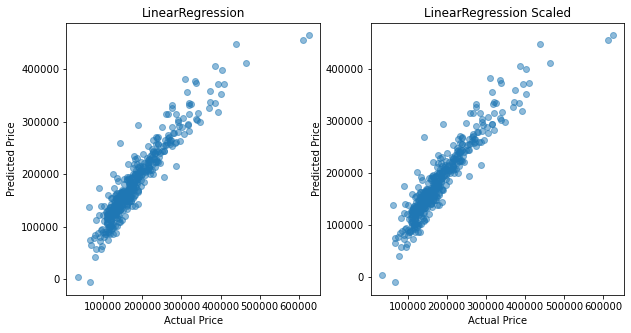

In [13]:
rmses = {}
r2scores = {}
alphas = {}

# Linear regression helper function
def LR_help(X_train, y_train, X_test, y_test, scale, numcols):
    
    if scale == 'y':
        # Initialize Standard Scaler
        ss = StandardScaler()
        
        X_train[numcols] = ss.fit_transform(X_train[numcols])
        X_test[numcols]  = ss.transform(X_test[numcols])
    
    lr = LinearRegression()
    lr = lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    return y_pred, rmse(y_test, y_pred), r2_score(y_test, y_pred)

# No scaling
y_pred_lr, rmses['lr'], r2scores['lr'] = LR_help(X_train, y_train, X_test, y_test, 'n', numcols)

# Scale
y_pred_lr_ss, rmses['lr_ss'], r2scores['lr_ss'] = LR_help(X_train, y_train, X_test, y_test, 'y', numcols)

# Plot
plot_compare(y_test, y_pred_lr, y_pred_lr_ss, 'LinearRegression')

# Print nice output
print('--------------------------------------------------------------------------')
print('Linear Regression RMSE       : {}\t  R2 Score: {}'.format(rmses['lr'], r2scores['lr']))
print('Linear Regression Scaled RMSE: {}\t  R2 Score: {}'.format(rmses['lr_ss'], r2scores['lr_ss']))
print('--------------------------------------------------------------------------')

#### RIDGE

In [14]:
# Ridge help
def ridge_help(X_train, y_train, X_test, y_test, alph, scale, numcols):
    
    if scale == 'y':
        # Initialize Standard Scaler
        ss = StandardScaler()
        
        X_train[numcols] = ss.fit_transform(X_train[numcols])
        X_test[numcols]  = ss.transform(X_test[numcols])
    
    rrcv = RidgeCV(alphas=alph, cv=kf).fit(X_train, y_train)
        
    y_pred = rrcv.predict(X_test)
    
    return y_pred, rmse(y_test, y_pred), r2_score(y_test, y_pred), rrcv.alpha_

--------------------------------------------------------------------------------------------------
Ridge Regression RMSE       : 27030.435240636893	  R2 Score: 0.8742758202293819	  Alpha: 239.5026619987486
Ridge Regression Scaled RMSE: 27030.435240636893	  R2 Score: 0.8742758202293819	  Alpha: 239.5026619987486
--------------------------------------------------------------------------------------------------


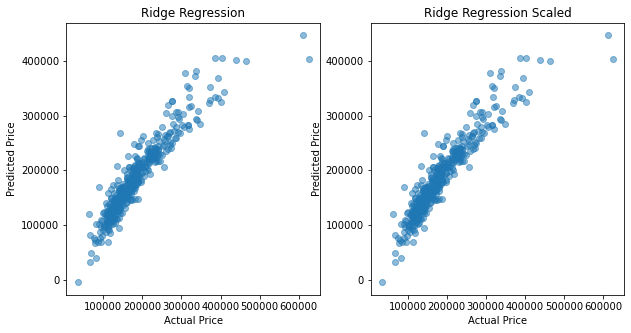

In [15]:
# Test alphas
alph = np.geomspace(1e-3, 1e3, 30)

# No scale
y_pred_rr, rmses['rrcv'], r2scores['rrcv'], alphas['rrcv'] = ridge_help(X_train, y_train, X_test, y_test, alph, 'n', numcols)

# Scale
y_pred_rr_ss, rmses['rrcv_ss'], r2scores['rrcv_ss'], alphas['rrcv_ss'] = ridge_help(X_train, y_train, X_test, y_test, alph, 'y', numcols)

# Plot
plot_compare(y_test, y_pred_rr, y_pred_rr_ss, 'Ridge Regression')

# Print nice output
print('--------------------------------------------------------------------------------------------------')
print('Ridge Regression RMSE       : {}\t  R2 Score: {}\t  Alpha: {}'.format(rmses['rrcv'], r2scores['rrcv'], alphas['rrcv']))
print('Ridge Regression Scaled RMSE: {}\t  R2 Score: {}\t  Alpha: {}'.format(rmses['rrcv_ss'], r2scores['rrcv_ss'], alphas['rrcv_ss']))
print('--------------------------------------------------------------------------------------------------')

#### LASSO

In [16]:
# LASSO Helper
def lasso_help(X_train, y_train, X_test, y_test, alph, scale, numcols):
    
    if scale == 'y':
        # Initialize Standard Scaler
        ss = StandardScaler()
        
        X_train[numcols] = ss.fit_transform(X_train[numcols])
        X_test[numcols]  = ss.transform(X_test[numcols])
    
    lscv = LassoCV(alphas=alph, max_iter=5e5, cv=kf).fit(X_train, y_train)
        
    y_pred = lscv.predict(X_test)
    
    return y_pred, rmse(y_test, y_pred), r2_score(y_test, y_pred), lscv.alpha_

--------------------------------------------------------------------------------------------------
Lasso Regression RMSE       : 24804.216110339454	  R2 Score: 0.8941322345273474	  Alpha: 452.035365636025
Lasso Regression Scaled RMSE: 24804.216110339446	  R2 Score: 0.8941322345273475	  Alpha: 452.035365636025
--------------------------------------------------------------------------------------------------


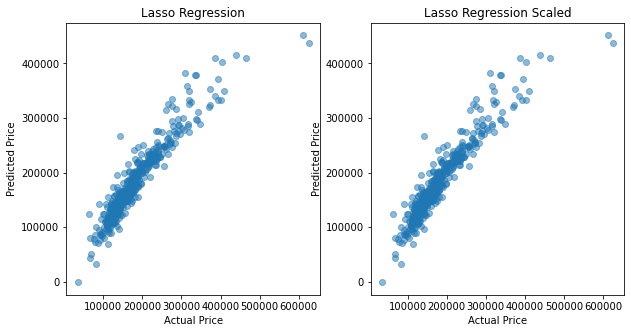

In [19]:
# Test alphas
alph = np.geomspace(1e-2, 1e3, 30)

# No scale
y_pred_ls, rmses['lscv'], r2scores['lscv'], alphas['lscv'] = lasso_help(X_train, y_train, X_test, y_test, alph, 'n', numcols)

# Scale
y_pred_ls_ss, rmses['lscv_ss'], r2scores['lscv_ss'], alphas['lscv_ss'] = lasso_help(X_train, y_train, X_test, y_test, alph, 'y', numcols)

# Plot
plot_compare(y_test, y_pred_ls, y_pred_ls_ss, 'Lasso Regression')

# Print nice output
print('--------------------------------------------------------------------------------------------------')
print('Lasso Regression RMSE       : {}\t  R2 Score: {}\t  Alpha: {}'.format(rmses['lscv'], r2scores['lscv'], alphas['lscv']))
print('Lasso Regression Scaled RMSE: {}\t  R2 Score: {}\t  Alpha: {}'.format(rmses['lscv_ss'], r2scores['lscv_ss'], alphas['lscv_ss']))
print('--------------------------------------------------------------------------------------------------')

#### ElasticNET

In [23]:
# Elasticnet helper
def elasticnet_help(X_train, y_train, X_test, y_test, alph, l1_ratios, scale, numcols):
    
    if scale == 'y':
        # Initialize Standard Scaler
        ss = StandardScaler()
        
        X_train[numcols] = ss.fit_transform(X_train[numcols])
        X_test[numcols]  = ss.transform(X_test[numcols])
    
    enetcv = ElasticNetCV(alphas=alph, l1_ratio=l1_ratios, max_iter=5e5, cv=kf).fit(X_train, y_train)
        
    y_pred = enetcv.predict(X_test)
    
    return y_pred, rmse(y_test, y_pred), r2_score(y_test, y_pred), enetcv.alpha_, enetcv.l1_ratio_

--------------------------------------------------------------------------------------------------
ElasticNet RMSE       : 27051.256700239846	  R2 Score: 0.8740820557462414	  Alpha: 2.592943797404667	 l1_ratio: 0.9
ElasticNet Scaled RMSE: 27051.256700239835	  R2 Score: 0.8740820557462415	  Alpha: 2.592943797404667	 l1_ratio: 0.9
--------------------------------------------------------------------------------------------------


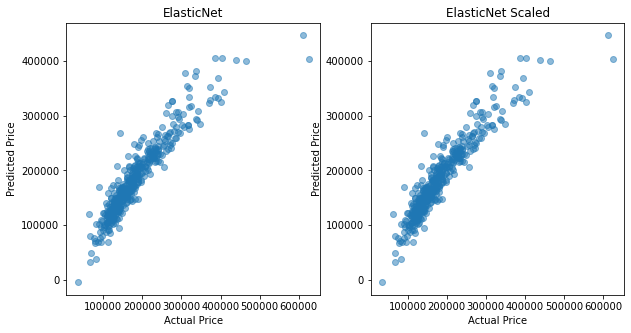

In [27]:
# Test alphas
alph = np.geomspace(1e-2, 1e3, 30)
l1_ratios = np.linspace(0.1, 0.9, 9)

# No scale
y_pred_en, rmses['enetcv'], r2scores['enetcv'], alphas['enetcv'], enet_l1 = elasticnet_help(X_train, y_train, X_test, y_test, alph, l1_ratios, 'n', numcols)

# Scale
y_pred_en_ss, rmses['enetcv_ss'], r2scores['enetcv_ss'], alphas['enetcv_ss'], enet_l1_ss = elasticnet_help(X_train, y_train, X_test, y_test, alph, l1_ratios, 'y', numcols)

# Plot
plot_compare(y_test, y_pred_en, y_pred_en_ss, 'ElasticNet')

# Print nice output
print('--------------------------------------------------------------------------------------------------')
print('ElasticNet RMSE       : {}\t  R2 Score: {}\t  Alpha: {}\t l1_ratio: {}'.format(rmses['enetcv'], r2scores['enetcv'], alphas['enetcv'], enet_l1))
print('ElasticNet Scaled RMSE: {}\t  R2 Score: {}\t  Alpha: {}\t l1_ratio: {}'.format(rmses['enetcv_ss'], r2scores['enetcv_ss'], alphas['enetcv_ss'], enet_l1_ss))
print('--------------------------------------------------------------------------------------------------')

#### Result Summary

In [29]:
resultdata = np.array([[r2scores['lr'], r2scores['lr_ss'], r2scores['rrcv'], r2scores['rrcv_ss'], r2scores['lscv'], r2scores['lscv_ss'], r2scores['enetcv'], r2scores['enetcv_ss']],
                       [rmses['lr'], rmses['lr_ss'], rmses['rrcv'], rmses['rrcv_ss'], rmses['lscv'], rmses['lscv_ss'], rmses['enetcv'], rmses['enetcv_ss']],
                       [np.nan, np.nan, alphas['rrcv'], alphas['rrcv_ss'], alphas['lscv'], alphas['lscv_ss'], alphas['enetcv'], alphas['enetcv_ss']],
                       [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, enet_l1, enet_l1_ss]])

resultpd = pd.DataFrame(resultdata, columns=['Linear', 'Linear_Scale', 'Ridge', 'Ridge_Scale', 'Lasso', 'Lasso_Scale', 'ElasticNet', 'ElasticNet_Scale'],
                        index=['R2_Score', 'RMSE', 'Alpha', 'l1_ratio'])

resultpd

,Linear,Linear_Scale,Ridge,Ridge_Scale,Lasso,Lasso_Scale,ElasticNet,ElasticNet_Scale
R2_Score,0.880946,0.879827,0.874276,0.874276,0.894132,0.894132,0.874082,0.874082
RMSE,26303.608362,26426.948022,27030.435241,27030.435241,24804.216110,24804.216110,27051.256700,27051.256700
Alpha,NaN,NaN,239.502662,239.502662,452.035366,452.035366,2.592944,2.592944
l1_ratio,NaN,NaN,NaN,NaN,NaN,NaN,0.900000,0.900000


#### With Polynomial Features

In [37]:
# Create Polynomial Features for non-one hot encoded data
pf = PolynomialFeatures(degree=2, include_bias=False,)

X_data_pf = pf.fit_transform(X_data[numcols])

colnames = pf.get_feature_names(numcols)

df = pd.DataFrame(X_data_pf, columns=colnames, index=data.index)

X_data_pf_df = pd.concat([data.drop(numcols, axis=1), df], axis=1)

In [39]:
# Split data to train and test datasets
X_train_pf, X_test_pf, y_train_pf, y_test_pf = train_test_split(X_data_pf_df, y_data, test_size=0.3, random_state=42)

--------------------------------------------------------------------------
Linear Regression PF RMSE       : 0.11655951096008065	  R2 Score: 0.9999999999976622
Linear Regression PF Scaled RMSE: 0.11652935627640687	  R2 Score: 0.9999999999976634
--------------------------------------------------------------------------


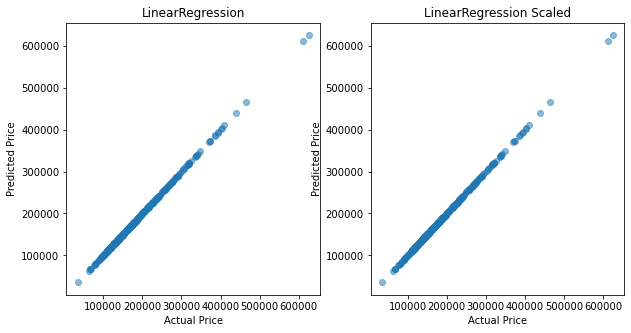

In [41]:
# No scaling
y_pred_lr_pf, rmses['lr_pf'], r2scores['lr_pf'] = LR_help(X_train_pf, y_train_pf, X_test_pf, y_test_pf, 'n', colnames)

# Scale
y_pred_lr_ss_pf, rmses['lr_ss_pf'], r2scores['lr_ss_pf'] = LR_help(X_train_pf, y_train_pf, X_test_pf, y_test_pf, 'y', colnames)

# Plot
plot_compare(y_test_pf, y_pred_lr_pf, y_pred_lr_ss_pf, 'LinearRegression')

# Print nice output
print('--------------------------------------------------------------------------')
print('Linear Regression PF RMSE       : {}\t  R2 Score: {}'.format(rmses['lr_pf'], r2scores['lr_pf']))
print('Linear Regression PF Scaled RMSE: {}\t  R2 Score: {}'.format(rmses['lr_ss_pf'], r2scores['lr_ss_pf']))
print('--------------------------------------------------------------------------')

In [ ]:
# Test alphas
alph = np.geomspace(1e-3, 1e3, 30)

# No scale
y_pred_rr_pf, rmses['rrcv_pf'], r2scores['rrcv_pf'], alphas['rrcv_pf'] = ridge_help(X_train_pf, y_train_pf, X_test_pf, y_test_pf, alph, 'n', colnames)

# Scale
y_pred_rr_ss_pf, rmses['rrcv_ss_pf'], r2scores['rrcv_ss_pf'], alphas['rrcv_ss_pf'] = ridge_help(X_train_pf, y_train_pf, X_test_pf, y_test_pf, alph, 'y', colnames)

# Plot
plot_compare(y_test_pf, y_pred_rr_pf, y_pred_rr_ss_pf, 'Ridge Regression')

# Print nice output
print('--------------------------------------------------------------------------------------------------')
print('Ridge Regression PF RMSE       : {}\t  R2 Score: {}\t  Alpha: {}'.format(rmses['rrcv_pf'], r2scores['rrcv_pf'], alphas['rrcv_pf']))
print('Ridge Regression PF Scaled RMSE: {}\t  R2 Score: {}\t  Alpha: {}'.format(rmses['rrcv_ss_pf'], r2scores['rrcv_ss_pf'], alphas['rrcv_ss_pf']))
print('--------------------------------------------------------------------------------------------------')

In the modeling process, 4 different models were designed. For each of the models root mean squared error between actual sales prices and predictions, and r2 score for model performance on a hold out set was estimated. Hold out set remained consistent between all models. Furthermore, hyperparameters were also estimated for Ridge, Lasso, and ElastiNet regression models. All results can be summarized as above. For all test cases KFold cross validation with 4 splits was used.
<br> It is evident from modeling that Lasso regression worked the best with an r2_score of 0.89, and with the lowest RMSE between test and predicted values on the hold out set. This suggests that Lasso Regression is the best model for predicting the Sales Price for this dataset.
<br> Further analysis was also done to test models when Polynomial Features were introduced. Here degree 2 polynomials were used to create feature interaction between non-one hot encoded data. This resulted in 38,780 features. Both Linear Regression and Ridge Regression were used to test this dataset. As can be seen from the plots above, in both cases the R2 score is almost equal to 1.0 and the RMSE is 0.11 for Linear and 8e-5 for Ridge Regression.

## Discussion and Future Steps
For the given dataset, the best possible model is the Lasso Regression model with an alpha of 452. Although, the Linear Regression and Ridge Regression models with Polynomial Features gives a near perfect results for the test dataset, it is important to note that in this case the number of feature (38,780) is much greater than the number of observation of 1375. Therefore, for this model to be reliable and generalized, it is important to have more data, atleast of the order equal to or greater than the number of features. Results from using polynomial features should not be taken into consideration for this dataset. When further data is available, these models can be tested and could yield better results. Furthermore, when more data is available, the polynomial features can give better insights into the deeper interaction between various features.